In [4]:
#import liberies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#import data from csv
data_path= './salaries.csv'

data_salary = pd.read_csv(data_path)

data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#1A

In [6]:
#create a dataframe with the columns needs of 1a.
select_columns=['experience_level','company_size','company_location','salary_in_usd','remote_ratio','work_year']
data_salary_redf = data_salary[select_columns].copy()
data_salary_redf






,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year
0,SE,L,US,202800,0,2023
1,SE,L,US,104300,0,2023
2,MI,M,GB,73824,0,2023
3,MI,M,GB,67672,0,2023
4,SE,M,US,290000,0,2023
...,...,...,...,...,...,...
7969,SE,L,US,412000,100,2020
7970,MI,L,US,151000,100,2021
7971,EN,S,US,105000,100,2020
7972,EN,L,US,100000,100,2020


In [7]:
#calculate the employee number by country  and add the avg_salary column to the dataframe
emp_by_country = data_salary_redf['company_location'].value_counts()
emp_by_country = emp_by_country.head()
emp_by_country = emp_by_country.to_frame().rename(columns={'count':'emp_num'})
emp_by_country






,emp_num
company_location,
US,6817
GB,397
CA,181
ES,106
DE,72


In [8]:
#Calculate the avg_salary for each county in the emp_by_country dataframe
avg_salary= data_salary_redf.groupby('company_location')['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary
    




,company_location,avg_salary
0,AD,50745.000000
1,AE,100000.000000
2,AM,50000.000000
3,AR,62000.000000
4,AS,34026.500000
...,...,...
68,TH,22971.333333
69,TR,22313.600000
70,UA,135600.000000
71,US,158694.199061


In [9]:
# merge both df
emp_by_country = emp_by_country.merge(avg_salary,how='left',on='company_location')
emp_by_country

,company_location,emp_num,avg_salary
0,US,6817,158694.199061
1,GB,397,107043.843829
2,CA,181,142539.519337
3,ES,106,56658.179245
4,DE,72,90456.666667


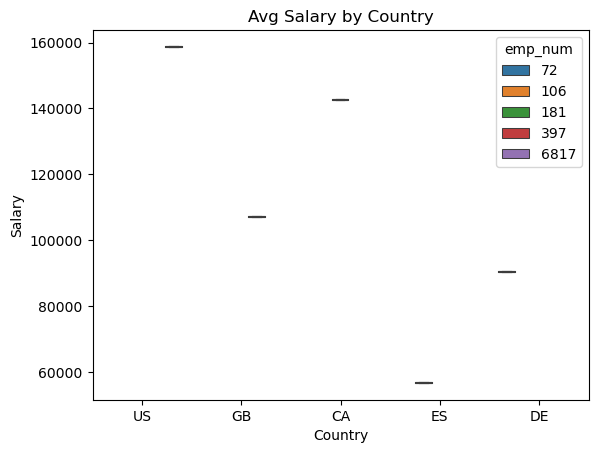

In [10]:
sns.boxplot(x='company_location',y='avg_salary',hue= 'emp_num',data= emp_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Avg Salary by Country')
plt.xticks()

plt.show()



In [11]:
salary_by_country = data_salary_redf.merge(emp_by_country,how='inner',on='company_location')
salary_by_country

,experience_level,company_size,company_location,salary_in_usd,remote_ratio,work_year,emp_num,avg_salary
0,SE,L,US,202800,0,2023,6817,158694.199061
1,SE,L,US,104300,0,2023,6817,158694.199061
2,SE,M,US,290000,0,2023,6817,158694.199061
3,SE,M,US,173200,0,2023,6817,158694.199061
4,SE,M,US,235000,100,2023,6817,158694.199061
...,...,...,...,...,...,...,...,...
7568,MI,L,DE,88654,50,2021,72,90456.666667
7569,EN,S,DE,62726,50,2020,72,90456.666667
7570,MI,L,DE,90734,50,2021,72,90456.666667
7571,SE,M,DE,173762,100,2021,72,90456.666667


In [12]:
salary_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7573 entries, 0 to 7572
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  7573 non-null   object 
 1   company_size      7573 non-null   object 
 2   company_location  7573 non-null   object 
 3   salary_in_usd     7573 non-null   int64  
 4   remote_ratio      7573 non-null   int64  
 5   work_year         7573 non-null   int64  
 6   emp_num           7573 non-null   int64  
 7   avg_salary        7573 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 473.4+ KB


In [13]:
salary_by_country.describe()

,salary_in_usd,remote_ratio,work_year,emp_num,avg_salary
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,153523.446587,38.749505,2022.739997,6163.776443,153523.446587
std,61830.236710,48.357133,0.520201,1962.125830,17589.559374
min,15000.000000,0.000000,2020.000000,72.000000,56658.179245
25%,110000.000000,0.000000,2023.000000,6817.000000,158694.199061
50%,145000.000000,0.000000,2023.000000,6817.000000,158694.199061
75%,190000.000000,100.000000,2023.000000,6817.000000,158694.199061
max,450000.000000,100.000000,2023.000000,6817.000000,158694.199061


In [14]:
salary_by_country_mean= salary_by_country.groupby('company_location')['salary_in_usd'].mean()
salary_by_country_mean

company_location
CA    142539.519337
DE     90456.666667
ES     56658.179245
GB    107043.843829
US    158694.199061
Name: salary_in_usd, dtype: float64

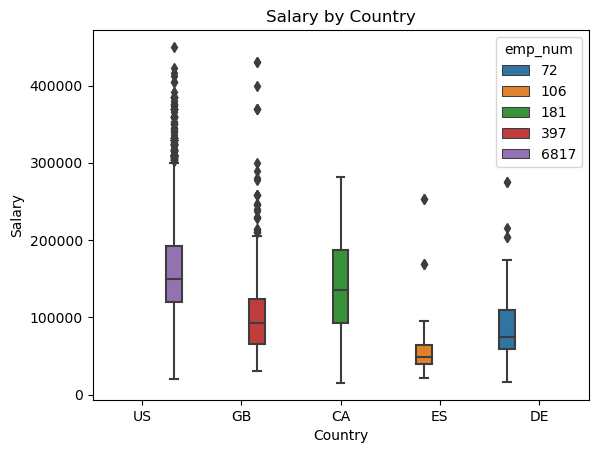

In [9]:
sns.boxplot(x='company_location',y='salary_in_usd',hue= 'emp_num',data= salary_by_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary by Country')
plt.xticks()

plt.show()

#1C

In [10]:
# calculate the avg salary vs remote ratio
avg_salary= data_salary_redf.groupby(['remote_ratio','work_year'])['salary_in_usd'].mean().reset_index()
avg_salary = avg_salary.rename(columns={'salary_in_usd':'avg_salary'})
avg_salary

,remote_ratio,work_year,avg_salary
0,0,2020,94258.111111
1,0,2021,106835.758621
2,0,2022,135076.266573
3,0,2023,160358.056051
4,50,2020,86879.142857
5,50,2021,81311.821918
6,50,2022,84297.524590
7,50,2023,80834.016393
8,100,2020,115214.083333
9,100,2021,109905.275862


In [11]:
# categorized the differents ratios

remote_types= {0:'Remote',
               50:'Hibrid',
               100:'Presential'}

avg_salary['remote_type']= avg_salary['remote_ratio'].map(remote_types)
avg_salary


,remote_ratio,work_year,avg_salary,remote_type
0,0,2020,94258.111111,Remote
1,0,2021,106835.758621,Remote
2,0,2022,135076.266573,Remote
3,0,2023,160358.056051,Remote
4,50,2020,86879.142857,Hibrid
5,50,2021,81311.821918,Hibrid
6,50,2022,84297.524590,Hibrid
7,50,2023,80834.016393,Hibrid
8,100,2020,115214.083333,Presential
9,100,2021,109905.275862,Presential


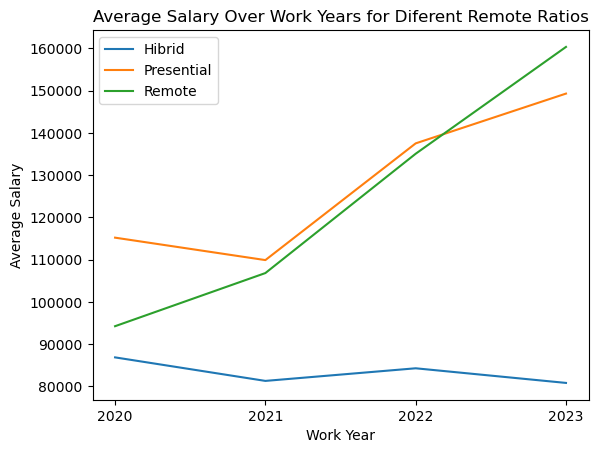

In [12]:
# create bar plot of the avg salary vs remote ratio
for r_type, group in avg_salary.groupby ('remote_type'):
    
    plt.plot(group['work_year'],group['avg_salary'],label=r_type)

plt.xticks(avg_salary['work_year'].unique())
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Over Work Years for Diferent Remote Ratios')
plt.legend()
plt.show()

In [13]:
data_salary = data_salary.rename(columns={
    'work_year':'Year_of_Employment',
    'experience_level':'Experience_Level',
    'employment_type':'Employment_Type',
    'job_title':'Job_Title',
    'salary':'Salary',
    'salary_currency':'Currency',
    'salary_in_usd':'Salary(USD)',
    'employee_residence':'Employee_Ressidence',
    'remote_ratio':'Remote_Status',
    'company_location':'Company_Location',
    'company_size':'Company_Size'})

data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [14]:
emp_dict = {'FT':'Full_Time',
            'PT':'Part_Time',
            'CT':'Contract',
            'FL':'Freelance'}

data_salary['Employment_Type'] = data_salary['Employment_Type'].replace(emp_dict)
data_salary 

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,Full_Time,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,Full_Time,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,Full_Time,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,Full_Time,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,Full_Time,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,Full_Time,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,Full_Time,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,Full_Time,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
employment_type = data_salary.set_index(['Employment_Type'])['Salary(USD)']
employment_type

Employment_Type
Full_Time    202800
Full_Time    104300
Full_Time     73824
Full_Time     67672
Full_Time    290000
              ...  
Full_Time    412000
Full_Time    151000
Full_Time    105000
Contract     100000
Full_Time     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [16]:
employment_type_avg = data_salary.groupby(['Employment_Type'])['Salary(USD)'].mean()
employment_type_avg

Employment_Type
Contract     120837.666667
Freelance     54734.363636
Full_Time    149724.790847
Part_Time     52053.153846
Name: Salary(USD), dtype: float64

In [17]:
employment_type_avg = employment_type_avg.sort_values(ascending=True)
employment_type_avg

Employment_Type
Part_Time     52053.153846
Freelance     54734.363636
Contract     120837.666667
Full_Time    149724.790847
Name: Salary(USD), dtype: float64

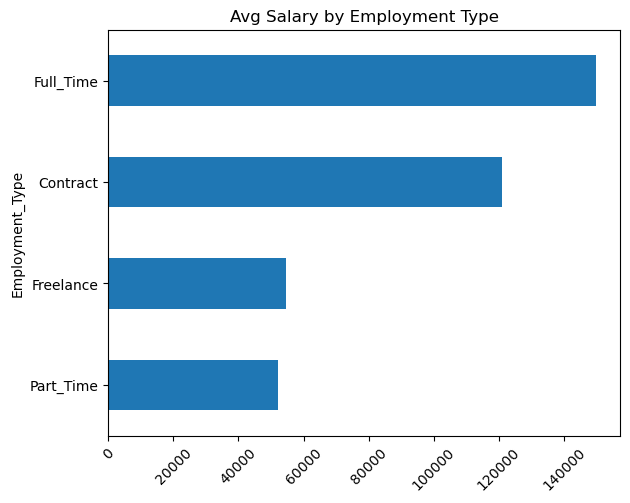

In [18]:
employment_type_avg.plot(kind='barh')


plt.title('Avg Salary by Employment Type')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [19]:
company_size = data_salary.set_index(['Company_Size'])['Salary(USD)']
company_size

Company_Size
L    202800
L    104300
M     73824
M     67672
M    290000
      ...  
L    412000
L    151000
S    105000
L    100000
L     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [20]:
company_size_avg = data_salary.groupby(['Company_Size'])['Salary(USD)'].mean()
company_size_avg

Company_Size
L    133621.020000
M    152336.441334
S     88727.403614
Name: Salary(USD), dtype: float64

In [21]:
company_size_avg = company_size_avg.sort_values(ascending=True)
company_size_avg

Company_Size
S     88727.403614
L    133621.020000
M    152336.441334
Name: Salary(USD), dtype: float64

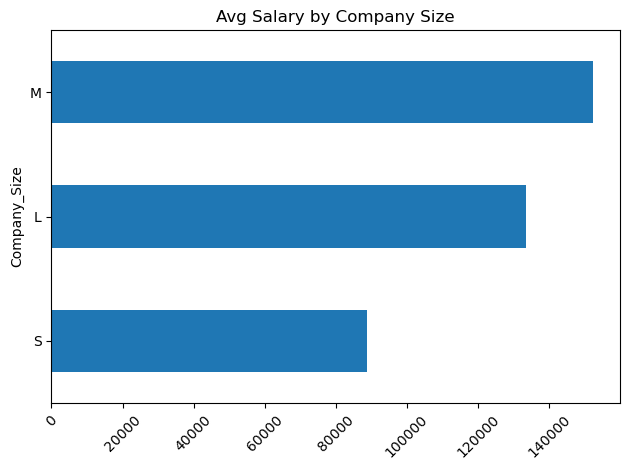

In [22]:
company_size_avg.plot(kind='barh')

plt.title('Avg Salary by Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
employment_type_count = data_salary['Employment_Type'].value_counts()
employment_type_count

Employment_Type
Full_Time    7932
Contract       18
Part_Time      13
Freelance      11
Name: count, dtype: int64

In [24]:
company_size_count = data_salary['Company_Size'].value_counts()
company_size_count

Company_Size
M    7108
L     700
S     166
Name: count, dtype: int64

#4


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [29]:
#import data from csv
data_path= './salaries.csv'

data_salary = pd.read_csv(data_path)

data_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M


In [28]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year_of_Employment  7974 non-null   int64 
 1   Experience_Level    7974 non-null   object
 2   Employment_Type     7974 non-null   object
 3   Job_Title           7974 non-null   object
 4   Salary(USD)         7974 non-null   int64 
 5   Employee_Residence  7974 non-null   object
 6   Remote_Status       7974 non-null   object
 7   Company_Location    7974 non-null   object
 8   Company_Size        7974 non-null   object
dtypes: int64(2), object(7)
memory usage: 560.8+ KB


In [26]:
#Transforming Data

#Renaming Columns to be more verbose and readable
data_salary.rename(columns= {'work_year':'Year_of_Employment',
                    'experience_level':'Experience_Level', 
                    'employment_type':'Employment_Type',
                    'job_title':'Job_Title', 
                    'employee_residence':'Employee_Residence',
                    'salary_in_usd':'Salary(USD)',
                    'remote_ratio': 'Remote_Status',
                    'company_location':'Company_Location',
                    'company_size':'Company_Size'}, inplace=True)

#Renaming Values in Columns to be more Verbose
#Renaming row values in Experience_Level
exp_dict = {'EN': 'Entry-level / Junior', 
            'MI': 'Mid-level / Intermediate', 
            'SE': 'Senior-level / Expert', 
            'EX': 'Executive-level / Director'}
data_salary['Experience_Level'] = data_salary['Experience_Level'].replace(exp_dict)

#Renaming row values in Employment_Type
emp_dict = {'PT': 'Part-time',
            'FT': 'Full-time',
            'CT': 'Contract',
            'FL':' Freelance'}
data_salary['Employment_Type'] = data_salary['Employment_Type'].replace(emp_dict)

#Replacing certain Shorthand Job Titles with their Long Form
title_dict = {'ML Engineer': 'Machine Learning Engineer',
              'BI Analyst': 'Business Intelligence Analyst',
              'BI Data Analyst': 'Business Intelligence Analyst',
              'BI Developer': 'Business Intelligence Developer',
              'BI Data Engineer': 'Business Intelligence Engineer'}
data_salary_df['Job_Title'] = data_salary_df['Job_Title'].replace(title_dict)

#Renaming row values in Remote_Status
remote_dict = {0: 'No Remote Work (Less than 20%)',
               50: 'Partially Remote/Hybrid',
               100: 'Fully Remote (More than 80%)'}
data_salary['Remote_Status'] = data_salary['Remote_Status'].replace(remote_dict)

#Renaming row values in Company_Size
size_dict = {'S': 'Small (Less than 50 Employees)',
             'M': 'Medium (50 to 250 Employees)',
             'L': 'Large (More than 250 Employees)'}
data_salary['Company_Size'] = data_salary['Company_Size'].replace(size_dict)

#Final Table
data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary(USD),Employee_Residence,Remote_Status,Company_Location,Company_Size
0,2023,Senior-level / Expert,Full-time,Business Intelligence Engineer,202800,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
1,2023,Senior-level / Expert,Full-time,Business Intelligence Engineer,104300,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
2,2023,Mid-level / Intermediate,Full-time,Data Manager,73824,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
3,2023,Mid-level / Intermediate,Full-time,Data Manager,67672,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
4,2023,Senior-level / Expert,Full-time,Data Scientist,290000,US,No Remote Work (Less than 20%),US,Medium (50 to 250 Employees)
...,...,...,...,...,...,...,...,...,...
7969,2020,Senior-level / Expert,Full-time,Data Scientist,412000,US,Fully Remote (More than 80%),US,Large (More than 250 Employees)
7970,2021,Mid-level / Intermediate,Full-time,Principal Data Scientist,151000,US,Fully Remote (More than 80%),US,Large (More than 250 Employees)
7971,2020,Entry-level / Junior,Full-time,Data Scientist,105000,US,Fully Remote (More than 80%),US,Small (Less than 50 Employees)
7972,2020,Entry-level / Junior,Contract,Business Data Analyst,100000,US,Fully Remote (More than 80%),US,Large (More than 250 Employees)


In [27]:
#Create a df for the the visualization
df_columns = ['Year_of_Employment','Experience_Level','Employment_Type','Job_Title','Salary(USD)','Employee_Residence','Remote_Status','Company_Location','Company_Size']
data_salary_df = data_salary[df_columns].copy()
data_salary_df.head()

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary(USD),Employee_Residence,Remote_Status,Company_Location,Company_Size
0,2023,Senior-level / Expert,Full-time,Business Intelligence Engineer,202800,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
1,2023,Senior-level / Expert,Full-time,Business Intelligence Engineer,104300,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
2,2023,Mid-level / Intermediate,Full-time,Data Manager,73824,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
3,2023,Mid-level / Intermediate,Full-time,Data Manager,67672,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
4,2023,Senior-level / Expert,Full-time,Data Scientist,290000,US,No Remote Work (Less than 20%),US,Medium (50 to 250 Employees)


In [30]:
# Count how many employees per company country and the country that has more employees
employee_num_per_country = data_salary_df['Company_Location'].value_counts()
employee_num_per_country = employee_num_per_country.nlargest()


how_much = data_salary_df['Job_Title'].value_counts()
how_much.head(15)

Data Engineer                     1888
Data Scientist                    1688
Data Analyst                      1188
Machine Learning Engineer          816
Applied Scientist                  226
Research Scientist                 219
Analytics Engineer                 218
Data Architect                     179
Data Manager                       128
Research Engineer                  123
Business Intelligence Engineer     102
Data Science Manager                90
ML Engineer                         89
Machine Learning Scientist          68
BI Developer                        42
Name: Job_Title, dtype: int64

In [31]:
#Select only for the visualization
scatter_avrg = data_salary_df[['Year_of_Employment','Employment_Type','Salary(USD)','Company_Location']]
scatter_avrg.head()

,Year_of_Employment,Employment_Type,Salary(USD),Company_Location
0,2023,Full-time,202800,US
1,2023,Full-time,104300,US
2,2023,Full-time,73824,GB
3,2023,Full-time,67672,GB
4,2023,Full-time,290000,US


In [32]:
#Only the top 5 company location with the most employees, which are US    6817, GB     397, CA     181, ES     106, DE      72
only_5 = scatter_avrg[scatter_avrg["Company_Location"].isin(['US','GB','CA', 'ES', 'DE'])].reset_index(drop=True)
only_5

only_5_types = data_salary_df[data_salary_df["Job_Title"].isin(['Data Engineer','Data Scientist ','Data Analyst', 'Machine Learning Enginee', 'Applied Scientist','Analytics Engineer','Data Architect', 'Data Manager','Research Engineer'])].reset_index(drop=True)
only_5_types

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary(USD),Employee_Residence,Remote_Status,Company_Location,Company_Size
0,2023,Mid-level / Intermediate,Full-time,Data Manager,73824,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
1,2023,Mid-level / Intermediate,Full-time,Data Manager,67672,GB,No Remote Work (Less than 20%),GB,Medium (50 to 250 Employees)
2,2023,Senior-level / Expert,Full-time,Analytics Engineer,160000,US,No Remote Work (Less than 20%),US,Medium (50 to 250 Employees)
3,2023,Senior-level / Expert,Full-time,Analytics Engineer,136000,US,No Remote Work (Less than 20%),US,Medium (50 to 250 Employees)
4,2023,Senior-level / Expert,Full-time,Data Architect,206000,US,No Remote Work (Less than 20%),US,Medium (50 to 250 Employees)
...,...,...,...,...,...,...,...,...,...
3945,2021,Mid-level / Intermediate,Full-time,Data Analyst,75000,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
3946,2021,Mid-level / Intermediate,Full-time,Data Analyst,62000,US,No Remote Work (Less than 20%),US,Large (More than 250 Employees)
3947,2021,Mid-level / Intermediate,Full-time,Data Engineer,45391,NL,Fully Remote (More than 80%),NL,Large (More than 250 Employees)
3948,2020,Mid-level / Intermediate,Full-time,Data Engineer,130800,ES,Fully Remote (More than 80%),US,Medium (50 to 250 Employees)


In [33]:
#To know how much is in every Employment tu
count_full_time = len(only_5[only_5["Employment_Type"] == "Full-time"])
count_contract = len(only_5[only_5['Employment_Type'] == "Contract"])
count_part_time = len(only_5[only_5['Employment_Type'] == "Part-time"])
count_freelance = len(only_5[only_5['Employment_Type'] == "Freelance"])

In [34]:
#The average salary in the top 5 countries.
average_salary_per_country = only_5.groupby('Company_Location')['Salary(USD)'].mean().reset_index()
average_salary_per_country = average_salary_per_country.rename(columns={'Salary(USD)':'Company_Location'})


average_salary_per_employment_type = only_5.groupby('Employment_Type')['Salary(USD)'].mean().reset_index()
average_salary_per_employment_type = average_salary_per_employment_type.rename(columns={'Salary(USD)':'Employment_Type'})
average_salary_per_employment_type


average_salary_per_employment = only_5_types.groupby('Job_Title')['Salary(USD)'].mean().reset_index()
average_salary_per_employment = average_salary_per_employment.rename(columns={'Salary(USD)':'Job_Title'})
average_salary_per_employment

,Job_Title,Job_Title
0,Analytics Engineer,157163.371560
1,Applied Scientist,189806.358407
2,Data Analyst,109914.848485
3,Data Architect,162623.972067
4,Data Engineer,146625.766419
5,Data Manager,108830.359375
6,Research Engineer,182500.878049


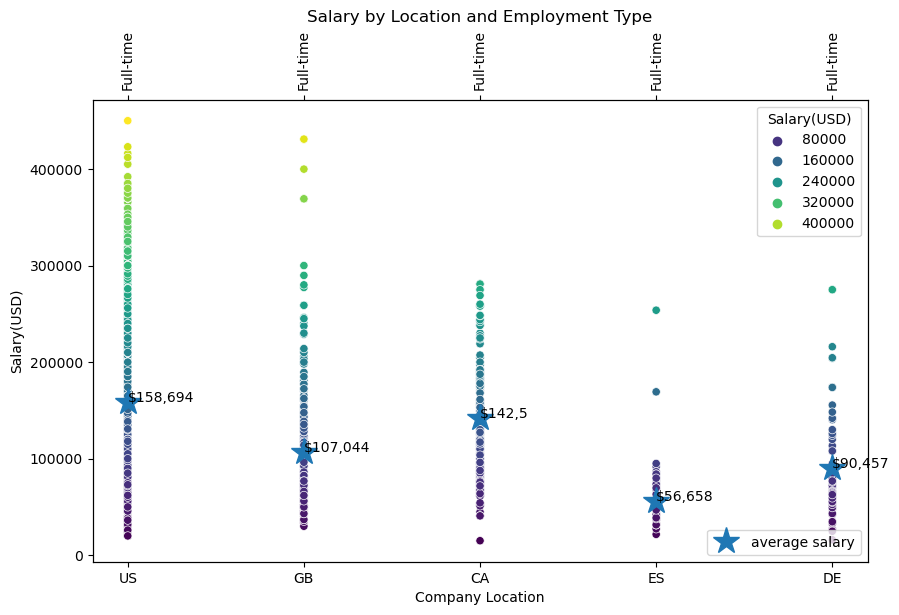

In [35]:
# Create a scatter plot with 'Company_Location' on the x-axis and 'Salary(USD)' on the y-axis
plt.figure(figsize=(10, 6))  # Set the figure size
ax1 = sns.scatterplot(data=only_5, x='Company_Location', y='Salary(USD)', hue='Salary(USD)', palette='viridis')

# Create a second x-axis
ax2 = ax1.twiny()

# Align the 'Employment_Type' labels with the corresponding 'Company_Location' values
secondary_x_labels = only_5.groupby('Company_Location')['Employment_Type'].first().tolist()

# Set the labels for the second x-axis
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels(secondary_x_labels, rotation=90)

# Set the labels for the y-axis
ax1.set(xlabel='Company Location', ylabel='Salary(USD)')

# Rotate the primary x-axis labels for better readability (optional)
plt.xticks(rotation=90)

#Add extra points to point mark the average in each country
plt.plot(['US', 'GB','CA', 'ES', 'DE'], [158694.199061, 107043.843829,142539.519337, 56658.179245, 90456.666667], marker='*', ls='none', ms=20)

# Set the title
plt.title('Salary by Location and Employment Type')
#Legend of the mark
average = plt.legend(["average salary"], ncol = 3 , loc = "lower right")


# Label points with customizations
plt.text('US',158694.199061,'$158,694',horizontalalignment='left')
plt.text('GB',107043.843829,'$107,044',horizontalalignment='left')
plt.text('CA',142539.519337,'$142,5',horizontalalignment='left')
plt.text('ES',56658.179245,'$56,658',horizontalalignment='left')
plt.text('DE',90456.666667,'$90,457',horizontalalignment='left')

# Show the plot
plt.show()


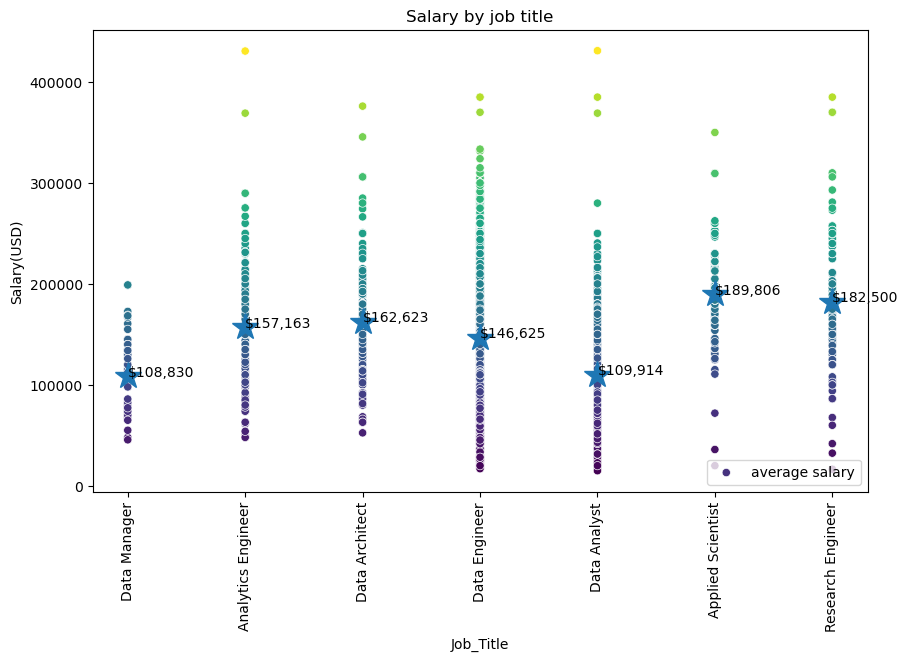

In [36]:
# Create a scatter plot with 'Company_Location' on the x-axis and 'Salary(USD)' on the y-axis
plt.figure(figsize=(10, 6))  # Set the figure size
ax1 = sns.scatterplot(data=only_5_types, x='Job_Title', y='Salary(USD)', hue='Salary(USD)', palette='viridis')


# Set the labels for the y-axis
ax1.set(xlabel='Job_Title', ylabel='Salary(USD)')

# Rotate the primary x-axis labels for better readability (optional)
plt.xticks(rotation=90)

#Add extra points to point mark the average in each country
plt.plot(['Analytics Engineer', 'Applied Scientist','Data Analyst', 'Data Architect', 'Data Engineer', 'Data Manager','Research Engineer' ], [157163.371560, 189806.358407,109914.848485, 162623.972067, 146625.766419,108830.359375, 182500.87804], marker='*', ls='none', ms=20)

# Set the title
plt.title('Salary by job title')
#Legend of the mark
average = plt.legend(["average salary"], ncol = 3 , loc = "lower right")


# Label points with customizations
plt.text('Analytics Engineer',157163.371560,'$157,163',horizontalalignment='left')
plt.text('Applied Scientist',189806.358407,'$189,806',horizontalalignment='left')
plt.text('Data Analyst',109914.848485,'$109,914',horizontalalignment='left')
plt.text('Data Architect',162623.972067,'$162,623',horizontalalignment='left')
plt.text('Data Engineer',146625.766419,'$146,625',horizontalalignment='left')
plt.text('Data Manager',108830.359375,'$108,830',horizontalalignment='left')
plt.text('Research Engineer',182500.87804,'$182,500',horizontalalignment='left')

# Set the title
plt.title('Salary by job title')

# Show the plot
plt.show()

In [37]:
average_salary_per_experience = data_salary_df.groupby('Experience_Level')['Salary(USD)'].mean().reset_index()
average_salary_per_experience = average_salary_per_experience.rename(columns={'Salary(USD)':'Job_Title'})
average_salary_per_experience

,Experience_Level,Job_Title
0,Entry-level / Junior,86152.589744
1,Executive-level / Director,189666.587755
2,Mid-level / Intermediate,114481.865459
3,Senior-level / Expert,161740.380431


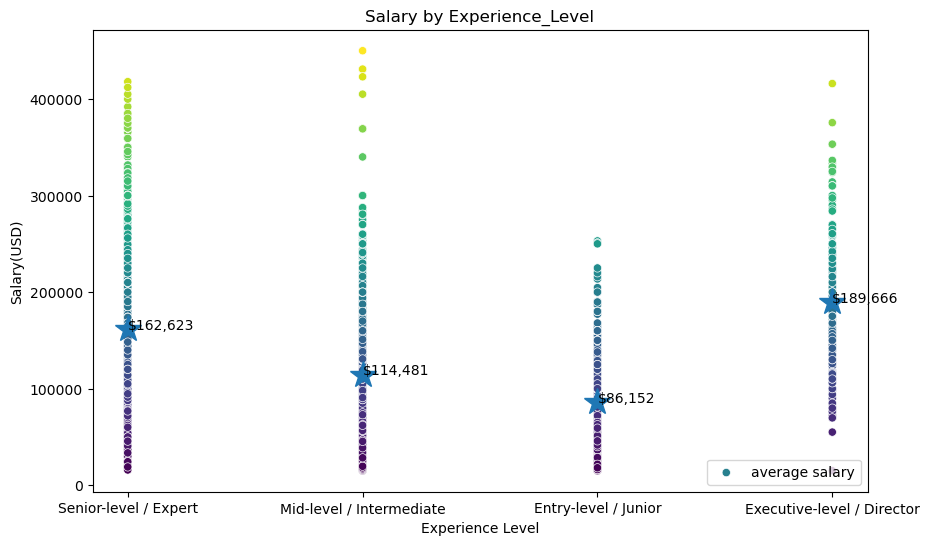

In [39]:
# Create a scatter plot with 'Company_Location' on the x-axis and 'Salary(USD)' on the y-axis
plt.figure(figsize=(10, 6))  # Set the figure size
ax1 = sns.scatterplot(data=data_salary_df, x='Experience_Level', y='Salary(USD)', hue='Salary(USD)', palette='viridis')


# Set the labels for the y-axis
ax1.set(xlabel='Experience Level', ylabel='Salary(USD)')

# Rotate the primary x-axis labels for better readability (optional)
plt.xticks(rotation=0)

#Add extra points to point mark the average in each country
plt.plot(['Executive-level / Director', 'Entry-level / Junior','Mid-level / Intermediate', 'Senior-level / Expert'], [189666.587755, 86152.589744,114481.865459, 161740.380431], marker='*', ls='none', ms=20)

                                                                       
# Set the title
plt.title('Salary by Experience_Level')
#Legend of the mark
average = plt.legend(["average salary"], ncol = 3 , loc = "lower right")


# Label points with customizations
plt.text('Executive-level / Director',189666.587755,'$189,666',horizontalalignment='left')
plt.text('Entry-level / Junior',86152.589744,'$86,152',horizontalalignment='left')
plt.text('Mid-level / Intermediate',114481.865459,'$114,481',horizontalalignment='left')
plt.text('Senior-level / Expert',161740.380431,'$162,623',horizontalalignment='left')


# Set the title
plt.title('Salary by Experience_Level')

# Show the plot
plt.show()

In [40]:
#Select only for the visualization
line_plot = data_salary_df[['Year_of_Employment','Experience_Level','Salary(USD)','Company_Location']]
line_plot

,Year_of_Employment,Experience_Level,Salary(USD),Company_Location
0,2023,Senior-level / Expert,202800,US
1,2023,Senior-level / Expert,104300,US
2,2023,Mid-level / Intermediate,73824,GB
3,2023,Mid-level / Intermediate,67672,GB
4,2023,Senior-level / Expert,290000,US
...,...,...,...,...
7969,2020,Senior-level / Expert,412000,US
7970,2021,Mid-level / Intermediate,151000,US
7971,2020,Entry-level / Junior,105000,US
7972,2020,Entry-level / Junior,100000,US


In [41]:
#The average salary for the experience.
average_salary_per_experience = line_plot.groupby('Experience_Level')['Salary(USD)'].mean().reset_index()
average_salary_per_experience = average_salary_per_experience.rename(columns={'Salary(USD)':'Experience_Level'})
average_salary_per_experience

,Experience_Level,Experience_Level
0,Entry-level / Junior,86152.589744
1,Executive-level / Director,189666.587755
2,Mid-level / Intermediate,114481.865459
3,Senior-level / Expert,161740.380431


In [42]:
#The average salary for years.
average_salary_per_experience = line_plot.groupby('Year_of_Employment')['Salary(USD)'].mean().reset_index()
average_salary_per_experience = average_salary_per_experience.rename(columns={'Salary(USD)':'Year_of_Employment	'})
average_salary_per_experience


,Year_of_Employment,Year_of_Employment\t
0,2020,102250.866667
1,2021,99922.073394
2,2022,134508.234545
3,2023,155808.402255


In [43]:
#To know how much employees for each year
year_2020 = len(line_plot[line_plot["Year_of_Employment"] == 2020]) #75 
year_2021 = len(line_plot[line_plot['Year_of_Employment'] == 2021]) #218
year_2022 = len(line_plot[line_plot['Year_of_Employment'] == 2022]) #1650
year_2023 = len(line_plot[line_plot['Year_of_Employment'] == 2023]) #6031

year_2023

6031

In [44]:
#To know how much employees for experience
Experience_Level_1 = len(line_plot[line_plot["Experience_Level"] == 'Entry-level / Junior']) #429
Experience_Level_2 = len(line_plot[line_plot['Experience_Level'] == 'Executive-level / Director']) #245
Experience_Level_3 = len(line_plot[line_plot['Experience_Level'] == 'Mid-level / Intermediate']) #1546
Experience_Level_4 = len(line_plot[line_plot['Experience_Level'] == 'Senior-level / Expert']) #5754

Experience_Level_4

5754

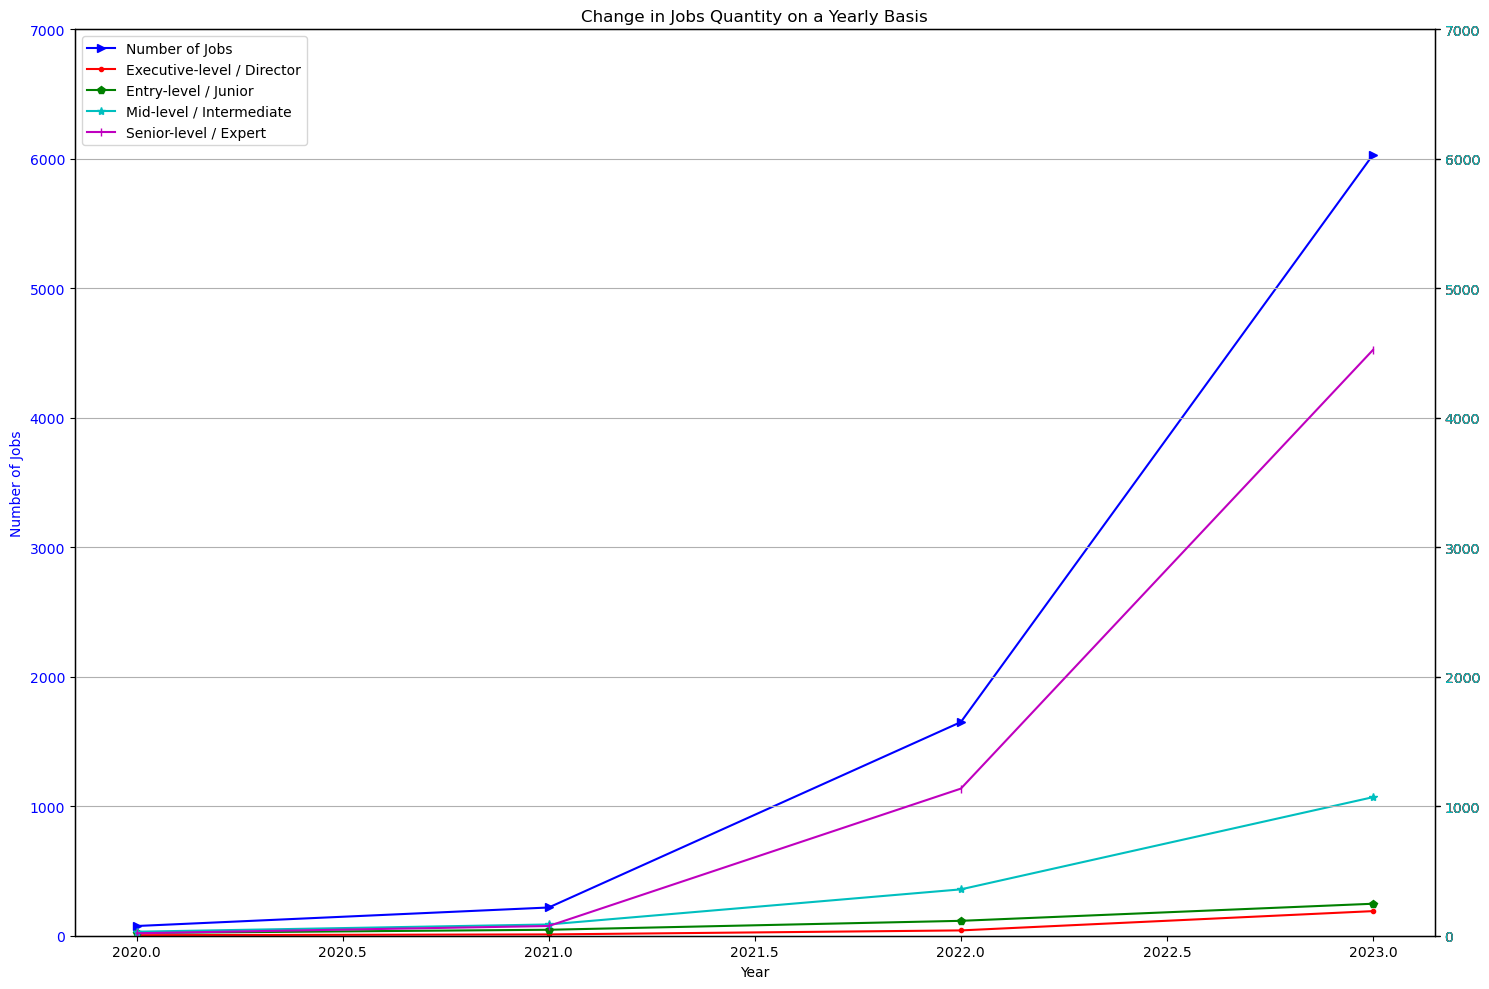

In [45]:
import matplotlib.pyplot as plt

unique_years = sorted(line_plot['Year_of_Employment'].unique())
number_of_jobs_per_year = [len(line_plot[line_plot['Year_of_Employment'] == year]) for year in unique_years]

# Calculate the number of jobs with the 'Executive-level / Director' experience level
Experience_Level_2 = len(line_plot[line_plot['Experience_Level'] == 'Executive-level / Director'])
Experience_Level_2

#Only from the 2020
only_2020 = line_plot[line_plot["Year_of_Employment"].isin([2020])].reset_index(drop=True)
Experience_Level_2_2020 = only_2020[only_2020['Experience_Level'].isin(['Executive-level / Director'])].reset_index(drop=True) #4
Experience_Level_1_2020 = only_2020[only_2020['Experience_Level'].isin(['Entry-level / Junior'])].reset_index(drop=True) #21
Experience_Level_3_2020 = only_2020[only_2020['Experience_Level'].isin(['Mid-level / Intermediate'])].reset_index(drop=True) #31
Experience_Level_4_2020 = only_2020[only_2020['Experience_Level'].isin(['Senior-level / Expert'])].reset_index(drop=True) #19

#Only from the 2021
only_2021 = line_plot[line_plot["Year_of_Employment"].isin([2021])].reset_index(drop=True)
Experience_Level_2_2021 = only_2021[only_2021['Experience_Level'].isin(['Executive-level / Director'])].reset_index(drop=True) #10
Experience_Level_1_2021 = only_2021[only_2021['Experience_Level'].isin(['Entry-level / Junior'])].reset_index(drop=True) #46
Experience_Level_3_2021 = only_2021[only_2021['Experience_Level'].isin(['Mid-level / Intermediate'])].reset_index(drop=True) #87
Experience_Level_4_2021 = only_2021[only_2021['Experience_Level'].isin(['Senior-level / Expert'])].reset_index(drop=True) #75

#Only from the 2022
only_2022 = line_plot[line_plot["Year_of_Employment"].isin([2022])].reset_index(drop=True)
Experience_Level_2_2022 = only_2022[only_2022['Experience_Level'].isin(['Executive-level / Director'])].reset_index(drop=True) #41
Experience_Level_1_2022 = only_2022[only_2022['Experience_Level'].isin(['Entry-level / Junior'])].reset_index(drop=True) #115
Experience_Level_3_2022 = only_2022[only_2022['Experience_Level'].isin(['Mid-level / Intermediate'])].reset_index(drop=True) #358
Experience_Level_4_2022 = only_2022[only_2022['Experience_Level'].isin(['Senior-level / Expert'])].reset_index(drop=True) #1136

#Only from the 2023
only_2023 = line_plot[line_plot["Year_of_Employment"].isin([2023])].reset_index(drop=True)
Experience_Level_2_2023 = only_2023[only_2023['Experience_Level'].isin(['Executive-level / Director'])].reset_index(drop=True) #190
Experience_Level_1_2023 = only_2023[only_2023['Experience_Level'].isin(['Entry-level / Junior'])].reset_index(drop=True) #247
Experience_Level_3_2023 = only_2023[only_2023['Experience_Level'].isin(['Mid-level / Intermediate'])].reset_index(drop=True) #1070
Experience_Level_4_2023 = only_2023[only_2023['Experience_Level'].isin(['Senior-level / Expert'])].reset_index(drop=True) #4524

# Create a figure and primary axes
fig, ax1 = plt.subplots(figsize=(15, 10))

# Primary y-axis for the number of jobs
ax1.plot(unique_years, number_of_jobs_per_year, color='b', label='Number of Jobs', marker='>')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Jobs', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0,7000)


# Create a secondary y-axis for Executive-level / Director
ax2 = ax1.twinx()

# Define the data for Executive-level / Director for each year (modify as needed)
Experience_Level_2_2020 = 4
Experience_Level_2_2021 = 10
Experience_Level_2_2022 = 41
Experience_Level_2_2023 = 190

# Create a list of the data
years = np.array(unique_years[:4])

experience_level_data_2 = [Experience_Level_2_2020, Experience_Level_2_2021, Experience_Level_2_2022, Experience_Level_2_2023]

# Plot the data for Executive-level / Director for each year
ax2.plot(years, experience_level_data_2, color='r', label='Executive-level / Director', marker='.')
ax2.set_ylim(0,7000) 

# Create the second secondary y-axis (modify as needed)
ax3 = ax1.twinx()

# Define the data for the second secondary y-axis for another metric
# Modify the values accordingly
Experience_Level_1_2020 = 21
Experience_Level_1_2021 = 46
Experience_Level_1_2022 = 115
Experience_Level_1_2023 = 247

experience_level_data_1 = [Experience_Level_1_2020, Experience_Level_1_2021, Experience_Level_1_2022, Experience_Level_1_2023]

# Plot the data for the second secondary y-axis
ax3.plot(years, experience_level_data_1, color='g', label='Entry-level / Junior',marker='p')
ax3.set_ylim(0,7000) 


# Create the second secondary y-axis (modify as needed)
ax4 = ax1.twinx()

# Define the data for the second secondary y-axis for another metric
# Modify the values accordingly
Experience_Level_3_2020 = 31
Experience_Level_3_2021 = 87
Experience_Level_3_2022 = 358
Experience_Level_3_2023 = 1070


# Create a list of the data
experience_level_data_3 = [Experience_Level_3_2020, Experience_Level_3_2021, Experience_Level_3_2022, Experience_Level_3_2023]

# Plot the data for the second secondary y-axis
ax4.plot(years, experience_level_data_3, color='c', label='Mid-level / Intermediate',marker='*')
ax4.set_ylabel(None)
ax4.set_ylim(0,7000) 
ax4.tick_params(axis='y', labelcolor='r')


# Create the second secondary y-axis (modify as needed)
ax5 = ax1.twinx()

Experience_Level_4_2020 = 19
Experience_Level_4_2021 = 75
Experience_Level_4_2022 = 1136
Experience_Level_4_2023 = 4524


experience_level_data_4 = [Experience_Level_4_2020, Experience_Level_4_2021, Experience_Level_4_2022, Experience_Level_4_2023]

ax5.plot(years, experience_level_data_4, color='m', label='Senior-level / Expert',marker='|')
ax5.set_ylabel(None)
ax5.set_ylim(0,7000) 
ax5.tick_params(axis='y', labelcolor='c')

# Combine the legends from all axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()
lines = lines1 + lines2 + lines3 + lines4 + lines5
labels = labels1 + labels2 + labels3 + labels4 + labels5


# Add legends
ax1.legend(lines, labels, loc='upper left')

plt.title('Change in Jobs Quantity on a Yearly Basis')

plt.grid(True)
plt.tight_layout()
plt.show()


